# 第 9 章 绘图和可视化

In [ ]:
#学习本章代码案例的最简单方法是在 Jupyter notebook 进行交互式绘图。在 Jupyter notebook 中执行下面的语句:
%matplotlib notebook

## 9.1 matplotlib API 入门 P271

In [1]:
import matplotlib.pyplot as plt

In [ ]:
#在 Jupyter 中运行%matplotlib notebook(或在 IPython 中运 行%matplotlib)，就可以创建一个简单的图形。
#如果一切设置正确，会看到图 9-1:

In [2]:
import numpy as np

In [3]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

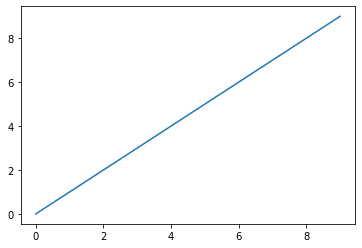

In [4]:
plt.plot(data)

## Figure 和 Subplot

In [ ]:
#matplotlib 的图像都位于 Figure 对象中。你可以用 plt.figure 创建一个新的 Figure

In [5]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [ ]:
#plt.figure 有一些选项，特别是 figsize，它用于确保当 图片保存到磁盘时具有一定的大小和纵横比。

In [ ]:
#不能通过空 Figure 绘图。必须用 add_subplot 创建一个或多个 subplot 才行:

In [7]:
ax1 = fig.add_subplot(2, 2, 1)

In [6]:
#这条代码的意思是:图像应该是 2×2 的(即最多 4 张图)，且当前选中的是 4 个 subplot 中的第一个(编号从 1 开始)。
#如果再把后面两个 subplot 也创建 出来，最终得到的图像如图 9-2 所示:

In [ ]:
#使用 Jupyter notebook 有一点不同，即每个小窗重新执行后，图形会被 重置。因此，对于复杂的图形，，你必须将所有的绘图命令存在一个小窗里。

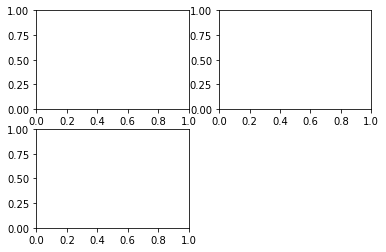

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

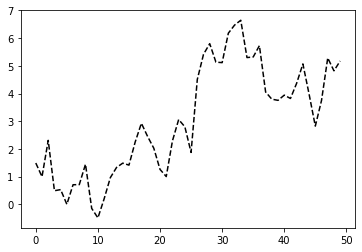

In [11]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

## 调整 subplot 周围的间距

## 颜色、标记和线型

## 刻度、标签和图例

## 设置标题、轴标签、刻度以及刻度标签

## 添加图例

## 注解以及在 Subplot 上绘图

## 将图表保存到文件

## matplotlib 配置

# 9.2 使用 pandas 和 seaborn 绘图 P285

## 线型图

## 柱状图

## 直方图和密度图

## 散布图或点图

## 分面网格(facet grid)和类型数据

# 9.3 其它的 Python 可视化工具 P302

# 9.4 总结 P303